Asfrosche

**Submisssion 2**


Importing Necessary Data and Libraries.


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import textblob, string
import xgboost as xgb
# keras
from keras import layers, models, optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import text, sequence
from lightgbm import LGBMClassifier
# sklearn
from sklearn import decomposition, ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
# algos
from textblob import TextBlob
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
from warnings import filterwarnings

filterwarnings('ignore')
import matplotlib.pyplot as plt
# stopworsd
import nltk
from nltk.corpus import stopwords
seed = 7
np.random.seed(seed)
%matplotlib inline
print("successfully imported libraries")

successfully imported libraries


Getting data from csv files and printing correlation values

In [ ]:
large = "pred_comp_3_and_4_training_large.csv" # df
small = "pred_comp_3_and_4_training_small.csv"
test_data = "pred_comp_3_and_4_test_data.csv" # df_t

# train data
df = pd.read_csv(large)
df["price"] = np.where(df["price"] > 40000, 0, 1)

df2 = pd.read_csv(small)
df2["price"] = np.where(df2["price"] > 40000, 0, 1)

# test data
df_t =  pd.read_csv(test_data)
df_t["price"] = np.where(df_t["price"] > 40000, 0, 1)
# df.isna().sum()
print(df.head())

corr = df.corr()
print(corr)

   price  year  mileage        city state       make           model
0      1  2016    19366  Shreveport    LA    Hyundai       TucsonFWD
1      1  2016    23413        PERU    IL  Chevrolet       Impala2LT
2      1  2011    82044      Conway    SC   Cadillac             CTS
3      1  2016    36691  West Allis    WI    Hyundai        AccentSE
4      1  2014    23752    Oroville    CA       Ford  FocusHatchback
            price      year   mileage
price    1.000000 -0.165705  0.179477
year    -0.165705  1.000000 -0.765377
mileage  0.179477 -0.765377  1.000000


In [ ]:
import copy
df_train=copy.deepcopy(df)
df_test=copy.deepcopy(df_t)

cols=np.array(df.columns[df.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(df.columns[df.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_train[cols] = df[cols]
df_test = df_test.apply(lambda x: d[x.name].fit_transform(x))
df_test[cols] = df_t[cols]
print(df_train.head())
print(df_test.head())


   city  state  make  model  price  year  mileage
0  2073     22    21   2219      1  2016    19366
1  1712     18     9   1142      1  2016    23413
2   460     46     8    431      1  2011    82044
3  2417     55    21    232      1  2016    36691
4  1691      5    15    928      1  2014    23752
   mileage  city  state  make  model  price  year
0    78669  1725      5     5     49      1  2011
1    14932  1440      5    48   2076      1  2016
2    53001   216      6    25    900      1  2014
3    64502  1561     51    10     30      1  2013
4    15295   992     18    22   1397      0  2016


In [ ]:
def Definedata():
    # define dataset
    data2 = df_train
    X = data2.drop(columns=['price']).values
    y0 = data2['price'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y

In [ ]:
def DefineTestdata():
    # define dataset
    data3 = df_test
    X = data3.drop(columns=['price']).values
    y0 = data3['price'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y

In [ ]:
def Models(models):
    
    model = models
    X_train, y_train = Definedata()
    X_test, y_test = DefineTestdata()
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X_train)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy                 : ', metrics.accuracy_score(y_test, y_pred))
    return y_total, y_train

In [ ]:
def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

Setting Training and Testing Data.
Making a list of classifiers

In [ ]:
X_train, y_train = Definedata()
X_test, y_test = DefineTestdata()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)
# Storing Classifiers we will be using to get best results
from sklearn.neighbors import KNeighborsClassifier
Classifiers = [['DecisionTreeClassifier',DecisionTreeClassifier()],
              ['XGBClassifier', XGBClassifier()],
              ['RandomForestClassifier', RandomForestClassifier()],
              ['AdaBoostClassifier',AdaBoostClassifier()],
              ['KNN',KNeighborsClassifier(n_neighbors=650)]]


Testing Accuracy on given classifiers

In [ ]:
Acc = pd.DataFrame(index=None, columns=['Accuracy on Testing set'])
for mod in Classifiers:
    name = mod[0]
    print(name)
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    val = metrics.accuracy_score(y_test, y_pred)
    Acc = Acc.append(pd.Series({'Accuracy on Testing set':val}),ignore_index=True )
    
# Sort values based on Accuracy
Acc.sort_values(by='Accuracy on Testing set', ascending = False)

Hence , KNN is the best classification algorithm with index 5 from the table we delve into the best value of neighbours

Obtaining most suitable accuracy value and filling arrays for required plots.

Appending multiple values to get best value of k in accuracy value.

In [ ]:
acc = []
error_rate = []
test_error = []
start_index = 1
end_index=25
onebyk=[]
step=2
# Will take some time

for i in range(start_index,end_index,step):
  name = "knn"
  print(i)
  model = KNeighborsClassifier(n_neighbors=i)
  neigh = model.fit(X_train,y_train)
  yhat = neigh.predict(X_test)
  y_t_hat = neigh.predict(X_train)
  y_pred = model.predict(X_test)
  val = metrics.accuracy_score(y_test, y_pred)
  error_rate.append(metrics.accuracy_score(y_train, y_t_hat))
  test_error.append(metrics.accuracy_score(y_test, y_pred))
  onebyk.append(1/i)
  print(val)

1
0.93394
3
0.93448
5
0.93517
7
0.93585
9
0.9365
11
0.93658
13
0.93659
15
0.93658
17
0.93657
19
0.93658
21
0.93658
23
0.93658


Resulting Confusion Matrix for Training set and Test set.
Along with maximum axxuracy obtained.

In [ ]:
print("Accuracy Score : ", 93.66)
neigh = KNeighborsClassifier(n_neighbors=25).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
y_train_pred = neigh.predict(X_train)
print("Confusion Matrix Train\n",metrics.confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix Test\n",metrics.confusion_matrix(y_test, Pred_y))

Accuracy Score :  93.66
Confusion Matrix Train
 [[   852  31734]
 [   497 466917]]
Confusion Matrix Test
 [[    0  6342]
 [    0 93658]]


# Plotting Results

Text(0, 0.5, 'Accuracy')

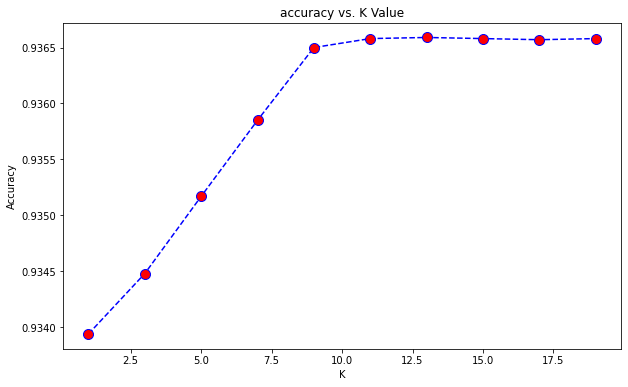

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(start_index,end_index,step),acc,color = 'blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",start_index + step*acc.index(max(acc)))

Question 2

Training error decreases as 1/K (model flexibility) increases,

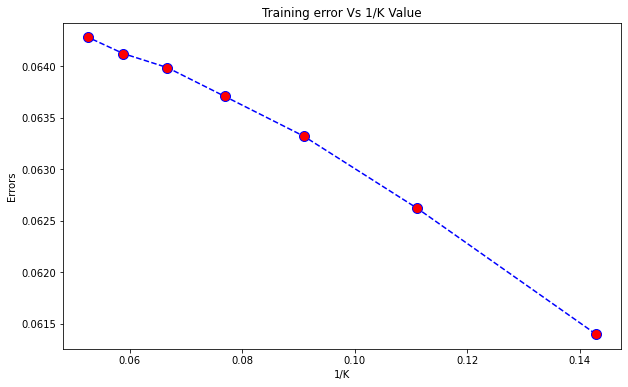

In [ ]:
error_rate = [1-x for x in error_rate]
r_err = error_rate[3:] 
r_one = onebyk[3:]
plt.figure(figsize=(10,6))
plt.plot(r_one,r_err,color = 'blue',linestyle='dashed',  
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Training error Vs 1/K Value')
plt.xlabel('1/K')
plt.ylabel('Errors')
# print("Min Error:-",min(error_rate),"at 1/K =",1/(start_index +
#  step*acc.index(min(error_rate))))
test_error = [1-x for x in test_error]
one_byk = onebyk[3:]
test_err = test_error[3:]

Test error first decreases and then increases
as 1/K (model flexibility) increases.

Text(0, 0.5, 'Error')

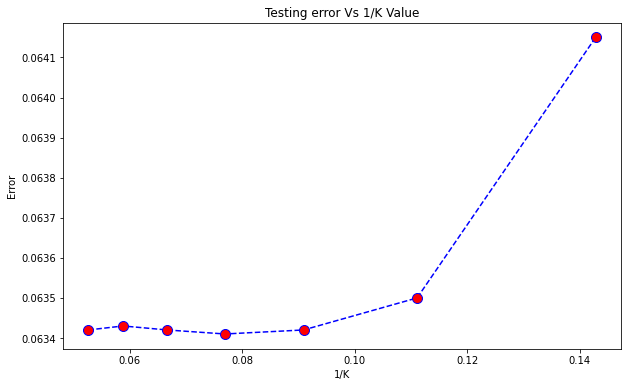

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(one_byk,test_err,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Testing error Vs 1/K Value')
plt.xlabel('1/K')
plt.ylabel('Error')


In [ ]:
while True:pass